In [386]:
#All the codes in this file are retrieved from Social Media and Network Analytics, Lab Notes, except for the codes from analysis part that come from the author
# importing packages and nltk data libraries
import string
import json
import codecs
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import ngrams
nltk.download('vader_lexicon')
from colorama import Fore, Back, Style
import pandas as pd
import matplotlib.pyplot as plt
import json
import pandas as pd
from nltk import ngrams
from collections import Counter

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [388]:
%load_ext autoreload
%autoreload 1
%aimport RedditProcessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [390]:
redditFile = 'Youtube_combined_Final.json'

## N-grams - Bigrams

In [392]:
import unicodedata

def remove_emojis(text):
    return ''.join(
        char for char in text
        if not unicodedata.category(char).startswith('So')  # Symbol, other
        and not unicodedata.category(char).startswith('Cs')  # Surrogate
    )

In [394]:
import json
import re
import nltk
import pandas as pd
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# NLTK downloads
nltk.download('stopwords')
nltk.download('wordnet')  
nltk.download('omw-1.4')

# File path
fJsonFileName = 'Youtube_combined_Final.json'
freqNum = 50

# Preprocessing setup
tweetTokenizer = TweetTokenizer()
punctuation = list(string.punctuation)
custom_stopwords = stopwords.words('english') + punctuation + [
    'rt', 'via', '...', '"', "'", '`', '’', 'http', 'https', 'www', '…', '”', '“',
    'even', 'im', 'would', 'could'
]
lemmatizer = WordNetLemmatizer()

# Clean + tokenize text
def processText(text, tokenizer, lemmatizer, stopwords):
    text = re.sub(u"(\u2018|\u2019|\u2014|\u201c|\u201d)", "", text)
    text = remove_emojis(text)
    tokens = tokenizer.tokenize(text.lower())
    return [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords and not token.isdigit()]

# Recursive comment token collector
def collect_tokens_from_comments(comments, tokenizer, lemmatizer, stopwords):
    tokens = []
    for comment in comments:
        text = comment.get('text', '')
        text = re.sub(u"(\u2018|\u2019|\u2014|\u201c|\u201d)", "", text)
        text = remove_emojis(text)
        tokens.extend(processText(text, tokenizer, lemmatizer, stopwords))
        if 'replies' in comment and comment['replies']:
            tokens.extend(collect_tokens_from_comments(comment['replies'], tokenizer, lemmatizer, stopwords))
    return tokens

# Collect all bigrams
all_bigrams = []

# Read JSON
with open(fJsonFileName, 'r', encoding='utf-8') as f:
    dSubmissions = json.load(f)

    for submission in dSubmissions:
        title = submission.get('Title', '')
        tokens_title = processText(title, tweetTokenizer, lemmatizer, custom_stopwords)
        
        comment_tokens = collect_tokens_from_comments(
            submission.get('Comments', []),
            tweetTokenizer, lemmatizer, custom_stopwords
        )

        combined_tokens = tokens_title + comment_tokens
        bigrams = list(ngrams(combined_tokens, 2))
        all_bigrams.extend(bigrams)

# Count and print
bigram_counts = Counter(all_bigrams)

print("\nTop 50 Most Common Bigrams:")
for bigram, count in bigram_counts.most_common(freqNum):
    print(f"{' '.join(bigram)}: {count}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Top 50 Most Common Bigrams:
snow white: 12881
gal gadot: 3340
evil queen: 2823
live action: 2321
look like: 1735
rachel zegler: 1571
weird weird: 1564
mirror mirror: 1198
mirror wall: 960
million dislike: 876
comment section: 834
little people: 735
magic mirror: 692
cgi dwarf: 683
watch movie: 667
white snow: 652
peter dinklage: 631
disney movie: 620
walt disney: 613
little mermaid: 519
can't wait: 513
dwarf actor: 491
snow brown: 485
sound like: 462
fairy tale: 451
cant wait: 434
original snow: 431
dislike button: 421
seven dwarf: 418
lord farquaad: 404
feel like: 401
see movie: 392
box office: 379
action remake: 371
came dislike: 370
wait see: 367
white movie: 361
like snow: 354
disney princess: 352
whistle work: 346
original movie: 339
snow woke: 337
girl bos: 336
rachel ziegler: 330
see dislike: 321
make sense: 321
poison apple: 320
original story: 317
look good: 315
youtube dislike: 309


In [48]:
import json
import re
import nltk
import pandas as pd
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# NLTK downloads
nltk.download('stopwords')
nltk.download('wordnet')  
nltk.download('omw-1.4')

# File path
fJsonFileName = 'Youtube_combined_Final.json'
freqNum = 200

# Preprocessing setup
tweetTokenizer = TweetTokenizer()
punctuation = list(string.punctuation)
custom_stopwords = stopwords.words('english') + punctuation + [
    'rt', 'via', '...', '"', "'", '`', '’', 'http', 'https', 'www', '…', '”', '“',
    'even', 'im', 'would', 'could'
]
lemmatizer = WordNetLemmatizer()

# Clean + tokenize text
def processText(text, tokenizer, lemmatizer, stopwords):
    text = re.sub(u"(\u2018|\u2019|\u2014|\u201c|\u201d)", "", text)
    text = remove_emojis(text)
    tokens = tokenizer.tokenize(text.lower())
    return [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords and not token.isdigit()]

# Recursive comment token collector
def collect_tokens_from_comments(comments, tokenizer, lemmatizer, stopwords):
    tokens = []
    for comment in comments:
        text = comment.get('text', '')
        text = re.sub(u"(\u2018|\u2019|\u2014|\u201c|\u201d)", "", text)
        text = remove_emojis(text)
        tokens.extend(processText(text, tokenizer, lemmatizer, stopwords))
        if 'replies' in comment and comment['replies']:
            tokens.extend(collect_tokens_from_comments(comment['replies'], tokenizer, lemmatizer, stopwords))
    return tokens

# Collect all bigrams
all_bigrams = []

# Read JSON
with open(fJsonFileName, 'r', encoding='utf-8') as f:
    dSubmissions = json.load(f)

    for submission in dSubmissions:
        title = submission.get('Title', '')
        tokens_title = processText(title, tweetTokenizer, lemmatizer, custom_stopwords)
        
        comment_tokens = collect_tokens_from_comments(
            submission.get('Comments', []),
            tweetTokenizer, lemmatizer, custom_stopwords
        )

        combined_tokens = tokens_title + comment_tokens
        trigrams = list(ngrams(combined_tokens, 3))
        all_bigrams.extend(trigrams)

# Count and print
trigram_counts = Counter(all_bigrams)

# Filter out any trigram that contains both "snow" and "white"
filtered_trigrams = [(tri, count) for tri, count in trigram_counts.items()
                     if not ('snow' in tri and 'white' in tri)]

filtered_trigram_counts = Counter(dict(filtered_trigrams))

print("\nTop 50 Most Common Trigrams (excluding 'snow white'):")
for trigram, count in filtered_trigram_counts.most_common(freqNum):
    print(f"{' '.join(trigram)}: {count}")



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Top 50 Most Common Trigrams (excluding 'snow white'):
mirror mirror wall: 682
live action remake: 368
weird weird weird: 309
return youtube dislike: 251
live action movie: 234
magic mirror wall: 231
woke go broke: 207
mirror wall who's: 191
go woke go: 180
can't wait see: 171
gal gadot snow: 169
live action snow: 157
white seven dwarf: 141
cant wait see: 140
white evil queen: 139
mirror wall fairest: 132
wall who's fairest: 125
movie gal gadot: 117
like dislike ratio: 113
queen gal gadot: 108
gal gadot look: 108
gal gadot evil: 107
disney live action: 105
white look like: 105
queen mirror mirror: 101
dwarf look like: 97
rooting evil queen: 93
gadot evil queen: 92
evil queen look: 90
evil queen beautiful: 89
look like lord: 88
taking one team: 87
evil queen snow: 83
beautiful gal gadot: 83
gal gadot win: 81
queen beautiful snow: 81
evil queen gal: 80
gal gadot beautiful: 79
live action disney: 79
live action version: 79
1.1 million dislike: 79
gal gadot jealous: 78
can't wait watch: 77

In [50]:
# Define your negative and positive sentiment words (lowercase)
negative_words = {'weird', 'bad', 'jealous', 'woke', 'hate', 'ugly', 'dislike', 'fake', 'annoying'}
positive_words = {'beautiful', 'best', 'love', 'good', 'amazing', 'talented', 'pretty', 'great', 'fair', 'prettier'}

# Target entities with their name tokens
snow_targets = {'snow', 'white', 'rachel', 'zegler'}
evil_targets = {'evil', 'queen', 'gal', 'gadot'}

# Filter trigrams
bad_about_snow_rachel = []
good_about_evil_gal = []

for trigram, count in trigram_counts.items():
    trigram_set = set(trigram)
    
    if (snow_targets.intersection(trigram_set) and negative_words.intersection(trigram_set)):
        bad_about_snow_rachel.append((trigram, count))
    
    if (evil_targets.intersection(trigram_set) and positive_words.intersection(trigram_set)):
        good_about_evil_gal.append((trigram, count))

bad_about_snow_rachel = sorted(bad_about_snow_rachel, key=lambda x: x[1], reverse=True)
good_about_evil_gal = sorted(good_about_evil_gal, key=lambda x: x[1], reverse=True)

print("\nTrigrams with negative sentiment about Snow White / Rachel Zegler:")
for tri, cnt in bad_about_snow_rachel[:50]:
    print(f"{' '.join(tri)}: {cnt}")

print("\nTrigrams with positive sentiment about Evil Queen / Gal Gadot:")
for tri, cnt in good_about_evil_gal[:50]:
    print(f"{' '.join(tri)}: {cnt}")



Trigrams with negative sentiment about Snow White / Rachel Zegler:
jealous snow white: 87
queen jealous snow: 53
hate snow white: 48
snow woke seven: 42
woke snow white: 41
dislike snow white: 40
snow white weird: 38
weird weird snow: 35
weird snow white: 33
snow white woke: 32
gadot jealous rachel: 32
white weird weird: 32
snow white hate: 26
hate rachel zegler: 25
weird weird rachel: 22
bad snow white: 20
snow white ugly: 20
jealous rachel zegler: 19
ugly snow white: 19
jealous snow white's: 16
snow white bad: 15
dislike rachel zegler: 14
white million dislike: 14
snow woke snow: 13
snow white jealous: 12
snow white dislike: 12
million dislike snow: 11
weird rachel zegler: 10
jealous rachel zegler's: 10
fake snow white: 9
rachel zegler weird: 9
snow weird weird: 9
movie snow woke: 8
snow woke disney: 8
zegler weird weird: 8
white snow woke: 8
dislike snow brown: 8
rachel zegler hate: 8
supposed jealous snow: 8
dislike button snow: 8
queen hate snow: 8
snow woke go: 7
snow woke cgi: 

/var/folders/k3/ppq5ys316sd1tn7_ctbkz1sw0000gn/T/ipykernel_10119/2892781963.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=phrases, palette=sns.color_palette(palette, len(counts))[::-1], ax=ax)
/var/folders/k3/ppq5ys316sd1tn7_ctbkz1sw0000gn/T/ipykernel_10119/2892781963.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=phrases, palette=sns.color_palette(palette, len(counts))[::-1], ax=ax)


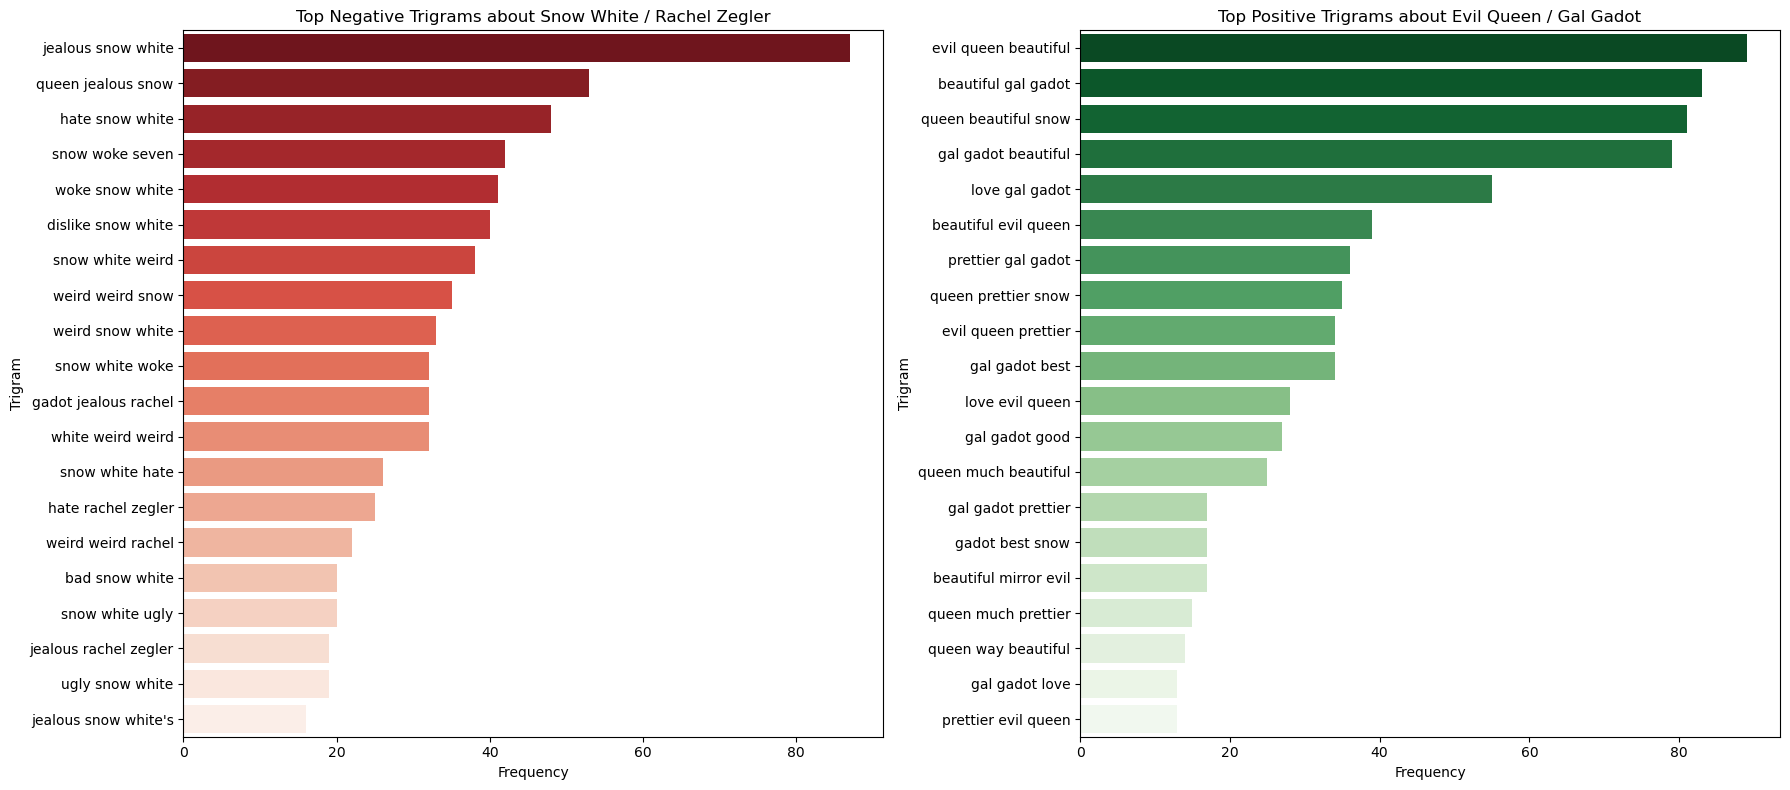

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_trigram_counts_subplot(trigram_list, ax, title, palette):
    phrases = [' '.join(tri) for tri, cnt in trigram_list[:20]]
    counts = [cnt for tri, cnt in trigram_list[:20]]

    sns.barplot(x=counts, y=phrases, palette=sns.color_palette(palette, len(counts))[::-1], ax=ax)
    
    ax.set_title(title)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Trigram')

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

plot_trigram_counts_subplot(bad_about_snow_rachel, axes[0], "Top Negative Trigrams about Snow White / Rachel Zegler", palette='Reds')
plot_trigram_counts_subplot(good_about_evil_gal, axes[1], "Top Positive Trigrams about Evil Queen / Gal Gadot", palette='Greens')

plt.tight_layout()
plt.show()


## Approach 1 - Word Counting

In [188]:
#From Social Media and Network Analytics, Lab Notes 
def computeSentiment(lTokens, setPosWords, setNegWords):
    """
    Compute the overall sentiment of the list of tokens in lTokens, using the countWordSentimentAnalysis approach.
    
    @param lTokens: List of tokens to calculate the overall sentiment for.
    @param setPosWords: Set of positive words.
    @param setNegWords: Set of negative words.
    
    @returns Sentiment score for lTokens.
    """           
    posNum = len([tok for tok in lTokens if tok in setPosWords])


    negNum = len([tok for tok in lTokens if tok in setNegWords])

    sentiment = posNum - negNum
                
    return sentiment

In [436]:
def printColouredTokens(lTokens, setPosWords, setNegWords, sentiment):
    """
    Print out the tokens in different colours, according to sentiment.
    If positive, in red.
    If negative, in blue.
    Otherwise no colouring.
    
    @param lTokens: List of tokens to print and colour.
    @param setPosWords: Set of positive words.
    @param setNegWords: Set of negative words.
    @param sentiment: Sentiment score of list of tokens.
    """
        
    for token in lTokens:
        if token in setPosWords:
            print(Fore.BLUE + token + ', ', end='')
        elif token in setNegWords:
            print(Fore.RED + token + ', ', end='')
        else:
            print(Style.RESET_ALL + token + ', ', end='')

    print(': {}'.format(sentiment))
    

In [192]:
def countWordSentimentAnalysis_YT(setPosWords, setNegWords, sFilename, bPrint, processText):
    lSentiment_count = []

    with open(sFilename, 'r', encoding='utf-8') as f:
        ytDump = json.load(f)

        for video in ytDump:
            # Process title
            title_text = video.get('Title', '')
            title_text = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
            title_text = remove_emojis(title_text)
            lTokens_title = processText(title_text, tweetTokeniser, tweetLemmatizer, lStopwords)
            sentiment_title = computeSentiment(lTokens_title, setPosWords, setNegWords)
            lSentiment_count.append(['title', sentiment_title])

            if bPrint:
                printColouredTokens(lTokens_title, setPosWords, setNegWords, sentiment_title)

            # Process all comments flatly
            comments = video.get('Comments', [])
            for comment in comments:
                comment_text = comment.get('text', '')
                comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
                comment_text = remove_emojis(comment_text)
                lTokens_comment = processText(comment_text, tweetTokeniser, tweetLemmatizer, lStopwords)
                sentiment_comment = computeSentiment(lTokens_comment, setPosWords, setNegWords)

                # Label comment type
                source_label = 'comment' if comment.get('parent_id') == 'root' else 'reply'
                lSentiment_count.append([source_label, sentiment_comment])

                if bPrint:
                    printColouredTokens(lTokens_comment, setPosWords, setNegWords, sentiment_comment)

    return lSentiment_count


## Approach 2 - Vader

In [438]:
#From Social Media and Network Analytics, Lab Notes 
def vaderPrintTokens(dSentimentScores):
    """
    Print out the tokens and sentiment score.
    
    @param lTokens: List of tokens to print and colour.
    @dSentimentScores: Dictionary of sentiment from Vader.

    """
    print(*lTokens, sep=', ')
    for cat,score in dSentimentScores.items():
        print('{0}: {1}, '.format(cat, score), end='')
    print()

In [489]:
def vaderSentimentAnalysis_YT(sJsonFilename, bPrint=False):
    """
    Use VADER sentiment analysis on YouTube JSON data (title + all flat comments).

    @returns: list of [source, sentiment_score, text]
    """
    sentAnalyser = SentimentIntensityAnalyzer()
    lSentiment_vader = []

    with open(sJsonFilename, 'r', encoding='utf-8') as f:
        ytDump = json.load(f)

        for video in ytDump:
            # Title
            title_text = video.get('Title', '')
            title_clean = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
            title_clean = remove_emojis(title_clean)
            score = sentAnalyser.polarity_scores(title_clean)
            lSentiment_vader.append(['title', score['compound'], title_clean])

            if bPrint:
                print(f"[Title] {title_clean}")
                print("Sentiment:", score)

            # Flat comments and replies
            for comment in video.get('Comments', []):
                text = comment.get('text', '')
                text_clean = re.sub(u"(\u2018|\u2019|\u2014)", "", text)
                text_clean = remove_emojis(text_clean)
                score = sentAnalyser.polarity_scores(text_clean)

                # Distinguish comment or reply based on parent_id
                source = 'comment' if comment.get('parent_id') == 'root' else 'reply'

                lSentiment_vader.append([source, score['compound'], text_clean])

                if bPrint:
                    print(f"[{source.capitalize()}] {text_clean}")
                    print("Sentiment:", score)

    return lSentiment_vader


In [442]:
# input file of set of postive words
posWordFile = 'positive-words.txt'
# input file of set of negative words
negWordFile = 'negative-words.txt'
# input file of set of reddit posts (json format)
redditFile = 'Youtube_combined.json'
flagPrint = True
# specify the approach to take, one of [count, vader]
# change this to use a different sentiment approach
approach = 'vader'

In [455]:
lPosWords = []
with open(posWordFile, 'r', encoding='utf-8', errors='ignore') as fPos:
    lPosWords = [line.strip() for line in fPos]
setPosWords = set(lPosWords)

lNegWords = []
with codecs.open(negWordFile, 'r', encoding='utf-8', errors='ignore') as fNeg:
    lNegWords = [line.strip() for line in fNeg]
setNegWords = set(lNegWords)


In [212]:
#Show result - # because the result is too long and the screen is frozen
with open(redditFile, 'r') as f:
    redditData = json.load(f)

lSentiment = []
if approach == 'count':
    lSentiment_count = countWordSentimentAnalysis_YT(setPosWords, setNegWords, redditFile, flagPrint, processText)
elif approach == 'vader':
    lSentiment_vader = vaderSentimentAnalysis_YT(redditFile, flagPrint)

[Title] 
Sentiment: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
[Title] 
Sentiment: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
[Title] 
Sentiment: {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}


## For Analysis Part

In [218]:
# Run overall sentiment analysis
lSentiment_vader = vaderSentimentAnalysis_YT('Youtube_combined_Final.json', bPrint=False)

# Extract compound scores
compound_scores = [entry[1] for entry in lSentiment_vader]

if compound_scores:
    overall_sentiment = sum(compound_scores) / len(compound_scores)
    print(f"Overall Sentiment Score: {overall_sentiment:.4f}")

    if overall_sentiment >= 0.05:
        label = "Positive"
    elif overall_sentiment <= -0.05:
        label = "Negative"
    else:
        label = "Neutral"
    
    print(f"Overall Sentiment: {label}")
else:
    print("No sentiment scores available.")

Overall Sentiment Score: 0.0064
Overall Sentiment: Neutral


In [226]:
lSentiment_vader = vaderSentimentAnalysis_YT("Youtube_combined_Final.json")

sorted_by_sentiment = sorted(lSentiment_vader, key=lambda x: x[1], reverse=True)
top3_positive = sorted_by_sentiment[:3]

unique_sentiments = []
seen_texts = set()

for entry in lSentiment_vader:
    if len(entry) < 3:
        continue 
    text = entry[2]
    if text not in seen_texts:
        unique_sentiments.append(entry)
        seen_texts.add(text)

sorted_by_sentiment = sorted(lSentiment_vader, key=lambda x: x[1], reverse=True)
top3_positive = sorted_by_sentiment[:3]

sorted_by_sentiment = sorted(unique_sentiments, key=lambda x: x[1])

top3_negative = sorted_by_sentiment[:3]


In [182]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import json
import re

def vaderSentimentAnalysis(sTweetsFilename, bPrint=False):
    """
    Use VADER lexicon for sentiment analysis on Reddit data.

    @param sTweetsFilename: name of input file containing a JSON-formatted Reddit dump
    @param bPrint: whether to print text and sentiment scores

    @returns: list of Reddit posts in the format [date, compound_score, original_text]
    """
    sentAnalyser = SentimentIntensityAnalyzer()
    lSentiment_vader = []

    # Load Reddit data
    with open(sTweetsFilename, 'r', encoding='utf-8') as f:
        redditDump = json.load(f)

        for submission in redditDump['submissions']:
            postDate = pd.to_datetime(submission['created'])

            title_text = submission.get('title', '')
            title_text = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
            title_text = remove_emojis(title_text)
            lTokens_title = processText(title_text, tweetTokeniser, tweetLemmatizer, lStopwords)
            sentiment_title = computeSentiment(lTokens_title, setPosWords, setNegWords)
            lSentiment_vader.append([postDate, sentiment_title])

            if bPrint:
                print(f"[Title] {title_text_clean}")
                print("Sentiment:", dSentimentScores)

            all_comment_tokens = []
            for comment in submission.get('comments', []):
                comment_text = comment.get('body', '')
                comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
                comment_text = remove_emojis(comment_text)
                lTokens_comment = processText(comment_text, tweetTokeniser, tweetLemmatizer, lStopwords)
                sentiment_comment = computeSentiment(lTokens_comment, setPosWords, setNegWords)
                lSentiment_vader.append([postDate, sentiment_comment])

                if bPrint:
                    print(f"[Comment] {comment_clean}")
                    print("Sentiment:", dSentimentScores)

    return lSentiment_vader

In [228]:
# Display Top 3 Positive Sentiments
print("\nTop 3 Positive Sentiments:")
for i, entry in enumerate(top3_positive, 1):
    date, score, text = entry
    print(f"{i}. Date: {date} | Compound Score: {score:.4f}")
    print(f"   Text: {text}\n")


Top 3 Positive Sentiments:
1. Date: comment | Compound Score: 0.9992
   Text: I am going to be taking up for this film. I saw it the morning it came out with a theater full of 7 and 8 year olds and they LOVED IT! Now, call me old fashioned, but aren't these films geared primarily toward children? And the theme of kindness is a lesson we should all get behind. After all, Snow White doesn't become the "fairest" to the Magic Mirror, until she shows the food-stealing Jonathan compassion, empathy, and kindness. This was such a great message, especially to girls who are growing up with such crazy standards of beauty. I also loved that this Disney Princess wasn't so traditional looking. No long, flowing tresses. Her beautiful, long hair was cut off by the evil queen as a punishment and way to control Snow White. Snow rolled with it and was still beautiful and just as much a heroine. 
Now, if your feelings are hurt because this children's film is not enough for your maturity, then look at the

In [230]:
# Display Top 3 Negative Sentiments
print("Top 3 Negative Sentiments:")
for i, entry in enumerate(top3_negative, 1):
    date, score, text = entry
    print(f"{i}. Date: {date} | Compound Score: {score:.4f}")
    print(f"   Text: {text}\n")

Top 3 Negative Sentiments:
1. Date: comment | Compound Score: -0.9982
   Text: I hate Disney. I hate Hollywood. I hate Google. I hate Microsoft. I hate Big Tech. I hate the Status Quo. I hate Disney. I hate Hollywood. I hate Google. I hate Microsoft. I hate Big Tech. I hate the Status Quo. I hate Disney. I hate Hollywood. I hate Google. I hate Microsoft. I hate Big Tech. I hate the Status Quo. I hate Disney. I hate Hollywood. I hate Google. I hate Microsoft. I hate Big Tech. I hate the Status Quo.

2. Date: comment | Compound Score: -0.9979
   Text: Communism, in theory, is not about not sharing, not being kind, or not caring about fairness  quite the opposite. At its core, communism seeks to create a classless, stateless society where the means of production are owned collectively, and resources are distributed based on need rather than profit. Whether or not one agrees with the ideology, its intentions are fundamentally rooted in fairness and equality.

So to say “she doesnt share or

# Word Could

In [459]:
with open('Youtube_combined_Final.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.json_normalize(data)

vader = SentimentIntensityAnalyzer()

In [461]:
with open('Youtube_combined_Final.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.json_normalize(data)

def processText(text):
    text = re.sub(r"[^\w\s]", "", text.lower()) 
    return text.split()

def word_count_sentiment(text):
    tokens = processText(str(text))
    pos_count = sum(1 for word in tokens if word in posWordFile)
    neg_count = sum(1 for word in tokens if word in negWordFile)
    total = len(tokens)
    return pd.Series({'pos_count': pos_count, 'neg_count': neg_count, 'total_words': total})

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nadiatoo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


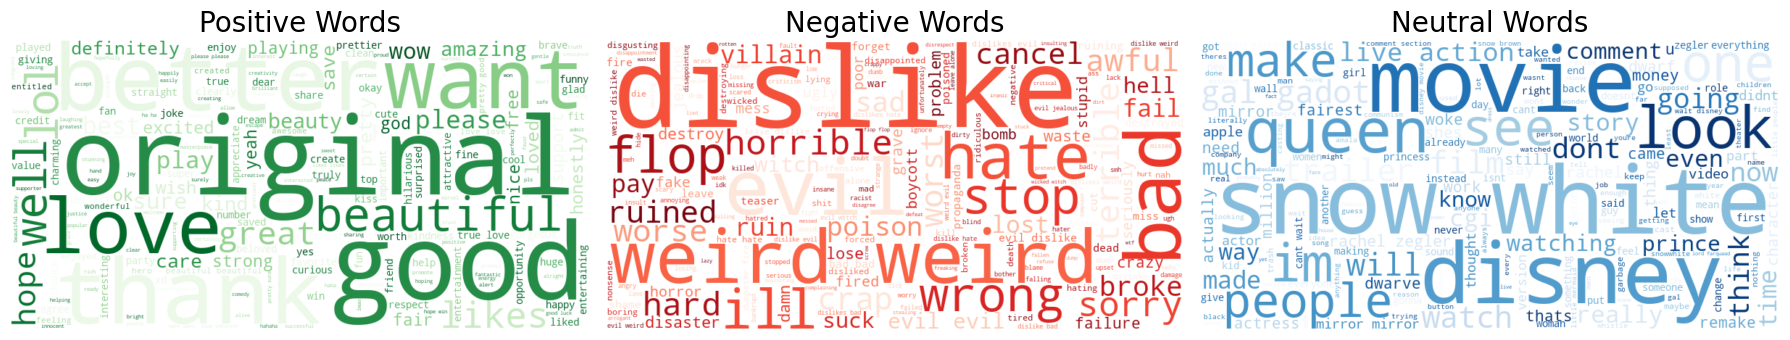

In [473]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Load JSON data
with open('Youtube_combined_Final.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Step 1: Extract all comment texts (including replies if available)
all_comments = []

for video in data:
    if 'Comments' in video:
        for comment in video['Comments']:
            # Add top-level comment
            if 'text' in comment:
                all_comments.append(comment['text'])
            # Check for replies
            if 'Replies' in comment and isinstance(comment['Replies'], list):
                for reply in comment['Replies']:
                    if 'text' in reply:
                        all_comments.append(reply['text'])

# Step 2: Convert to DataFrame
df = pd.DataFrame({'Text': all_comments})

# Step 3: Sentiment analysis
vader = SentimentIntensityAnalyzer()

def processText(text):
    text = re.sub(r"[^\w\s]", "", str(text).lower())
    return text.split()

# Step 4: Sort words by sentiment
pos_words, neg_words, neutral_words = [], [], []


for comment in df['Text']:
    words = processText(comment)
    for word in words:
        score = vader.polarity_scores(word)['compound']
        if score >= 0.05:
            pos_words.append(word)
        elif score <= -0.05:
            neg_words.append(word)
        else:
            neutral_words.append(word)


# Step 5: Generate word clouds safely
def safe_wordcloud(text, colormap):
    return WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(text) if text.strip() else None

wordcloud_pos = safe_wordcloud(" ".join(pos_words), 'Greens')
wordcloud_neg = safe_wordcloud(" ".join(neg_words), 'Reds')
wordcloud_neutral = safe_wordcloud(" ".join(neutral_words), 'Blues')

# Step 6: Plot
plt.figure(figsize=(18, 12))

if wordcloud_pos:
    plt.subplot(1, 3, 1)
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.title('Positive Words', fontsize=20)
    plt.axis('off')

if wordcloud_neg:
    plt.subplot(1, 3, 2)
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.title('Negative Words', fontsize=20)
    plt.axis('off')

if wordcloud_neutral:
    plt.subplot(1, 3, 3)
    plt.imshow(wordcloud_neutral, interpolation='bilinear')
    plt.title('Neutral Words', fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Visualization comparing two approaches of sentiment analysis

In [354]:
# def vaderSentimentAnalysis_YT(sJsonFilename, bPrint=False):
#     sentAnalyser = SentimentIntensityAnalyzer()
#     lSentiment_vader = []

#     with open(sJsonFilename, 'r', encoding='utf-8') as f:
#         ytDump = json.load(f)

#     for video in ytDump:
#         title_text = video.get('Title', '')
#         title_text = re.sub(u"(\u2018|\u2019|\u2014)", "", title_text)
#         title_text = remove_emojis(title_text)

#         # Try to get upload date if available
#         video_date = video.get('upload_date') or video.get('date') or None
#         try:
#             postDate = pd.to_datetime(video_date)
#         except:
#             postDate = None

#         vader_score = sentAnalyser.polarity_scores(title_text)['compound']
#         if postDate:
#             lSentiment_vader.append([postDate, vader_score])

#         if bPrint:
#             print(f"[Title] {title_text}")
#             print("Sentiment:", vader_score)

#         for comment in video.get('Comments', []):
#             comment_date = comment.get('timestamp')
#             try:
#                 comment_postDate = pd.to_datetime(comment_date)
#             except:
#                 continue  # skip invalid date

#             comment_text = comment.get('text', '')
#             comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
#             comment_text = remove_emojis(comment_text)

#             vader_score = sentAnalyser.polarity_scores(comment_text)['compound']
#             lSentiment_vader.append([comment_postDate, vader_score])

#             if bPrint:
#                 print(f"[Comment] {comment_text}")
#                 print("Sentiment:", vader_score)

#     return lSentiment_vader

In [491]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Emoji removal helper
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Sentiment analysis function
def vaderSentimentAnalysis_YT(sJsonFilename, bPrint=False):
    sentAnalyser = SentimentIntensityAnalyzer()
    lSentiment_vader = []

    with open(sJsonFilename, 'r', encoding='utf-8') as f:
        ytDump = json.load(f)

    for video in ytDump:
        for comment in video.get('Comments', []):
            comment_text = comment.get('text', '')
            timestamp = comment.get('timestamp', None)

            if timestamp is None:
                continue

            try:
                postDate = pd.to_datetime(int(timestamp), unit='s')
            except:
                continue

            comment_text = re.sub(u"(\u2018|\u2019|\u2014)", "", comment_text)
            comment_text = remove_emojis(comment_text)

            vader_score = sentAnalyser.polarity_scores(comment_text)['compound']
            lSentiment_vader.append([postDate, vader_score])

            if bPrint:
                print(f"[{postDate}] {comment_text}")
                print("Sentiment:", vader_score)

    return lSentiment_vader


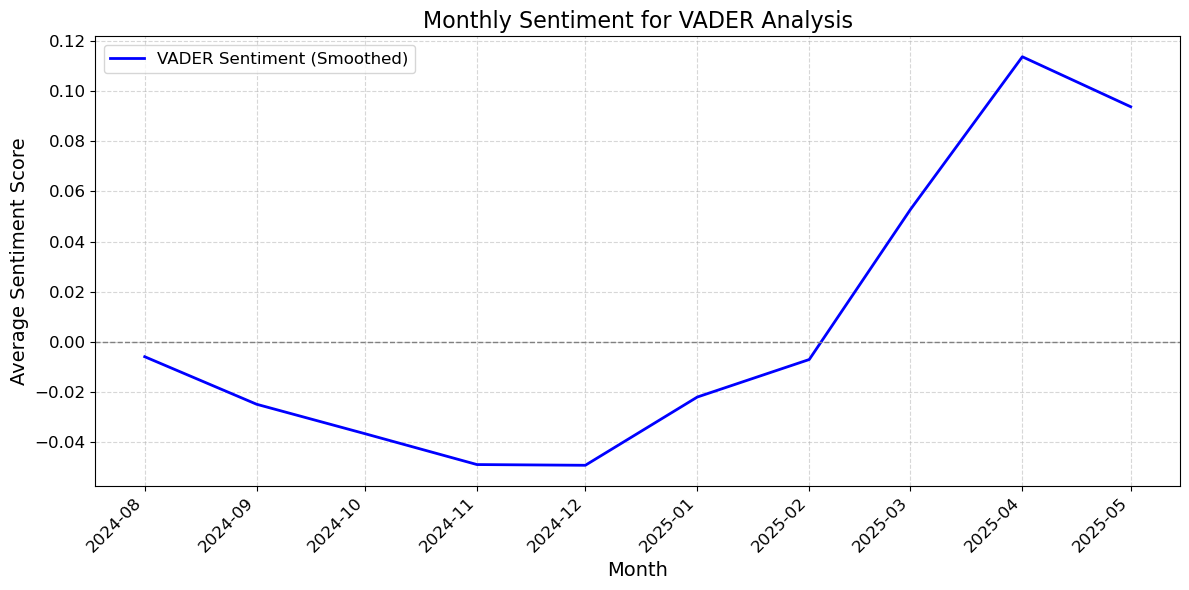

In [493]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

lSentiment_vader = vaderSentimentAnalysis_YT(sJsonFilename, bPrint=False)

# Convert to DataFrame
df_vader = pd.DataFrame(lSentiment_vader, columns=['date', 'sentiment'])
df_vader['date'] = pd.to_datetime(df_vader['date'], errors='coerce')
df_vader.dropna(subset=['date'], inplace=True)

today = pd.Timestamp.now()
df_vader = df_vader[df_vader['date'] < '2025-06-01']


df_vader.set_index('date', inplace=True)

# Resample and smooth
df_vader_resampled = df_vader.resample('MS').mean()
df_vader_resampled = df_vader_resampled[df_vader_resampled.index < '2025-06-01']
df_vader_resampled['smoothed'] = df_vader_resampled['sentiment'].rolling(window=2, min_periods=1).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_vader_resampled.index, df_vader_resampled['smoothed'], label='VADER Sentiment (Smoothed)', color='blue', linewidth=2)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)  # Neutral line

plt.title('Monthly Sentiment for VADER Analysis', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Sentiment Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [481]:
df_vader.sort_values(by='date', ascending=False)

,sentiment
date,
2025-05-23 05:41:00,0.4939
2025-05-23 05:39:00,0.4939
2025-05-22 18:00:00,0.0000
2025-05-22 15:00:00,-0.5423
2025-05-22 00:00:00,0.0000
...,...
2024-08-23 00:00:00,0.1779
2024-08-23 00:00:00,-0.3400
2024-08-23 00:00:00,0.0000


In [486]:
print(lSentiment_vader[:5])


[['title', 0.0, 'Disneys Snow White | In Theaters March 21'], ['comment', 0.4939, 'Una refrescante nueva versión.\n\nSalvo por la actuación en ciertas escenas en donde no está muy pulida que digamos, la película y su historia si son entretenidas, las canciones son pegadizas y sus letras muy lindas, la historia de amor en esta nueva versión tiene más sentido que en la versión original, es más natural y real, el vestuario es increíble, pero realmente siento que un muchas escenas el peinado de Blancanieves no estaba en su mejor esplendor, entiendo que la actriz tendría que haber guardado silencio con respecto a su opinión sobre esta nueva versión, pero no se dejen llevar por lo que dijo ella y lo que dicen los que puntean la película con una estrella, es una película atrapante y visualmente hermosa.'], ['comment', 0.0258, 'Likes 7,601\nDislikes 204,408 :face-purple-crying::text-green-game-over:'], ['comment', 0.0, 'SNOWFUCK'], ['comment', 0.4404, '7.5k  likes \n205k dislikes \nGreetings f